In [1]:
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
import sys
import os

os.chdir("..")
sys.path.append(os.getcwd())

In [3]:
import srd

In [4]:
tax = srd.tax(2020)

In [5]:
revenu_travail = np.linspace(0,150000,151)

In [6]:
revenu_disponible = []
for h in revenu_travail: 
  jean = srd.Person(earn=h)
  case = srd.Hhold(jean)
  case = tax.compute(case)
  revenu_disponible.append(case.fam_disp_inc)


# Taux effectif marginal d'imposition (TEMI)

In [7]:
temis = []
for i,h in enumerate(revenu_travail[:-1]): 
   x = (1.0 - (revenu_disponible[i+1] - revenu_disponible[i])/((revenu_travail[i+1]-revenu_travail[i]))) * 100 
   temis.append(x)

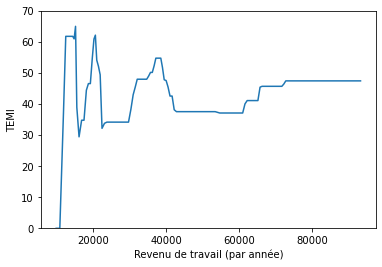

In [8]:
plt.figure()
plt.plot(revenu_disponible[:-1],temis)
plt.xlabel('Revenu de travail (par année)')
plt.ylabel('TEMI')
plt.ylim([0,70])
plt.show()

# Revenu disponible

## 40 000 $ et moins de revenu de travail

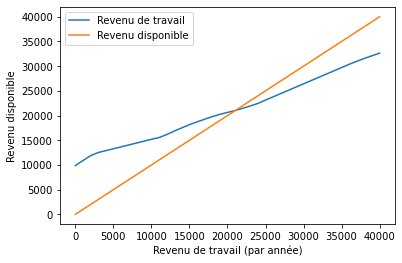

In [9]:
plt.figure()
plt.plot(revenu_travail[:41],revenu_disponible[:41],label='Revenu de travail')
plt.plot(revenu_travail[:41],revenu_travail[:41],label='Revenu disponible')
plt.xlabel('Revenu de travail (par année)')
plt.ylabel('Revenu disponible')
plt.legend()
plt.show()

# Taux moyen d'imposition

In [10]:
tmi = []
for i in range(1,151): 
    x = -(revenu_disponible[i] - revenu_travail[i])/((revenu_travail[i]))*100
   
    if x<=0: 
       x =0
   
    tmi.append(x)

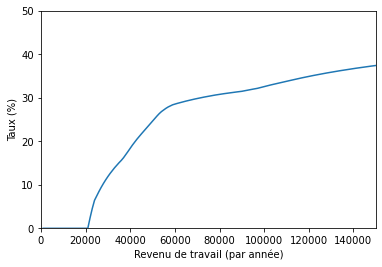

In [11]:
plt.figure()
plt.plot(revenu_travail[1:],tmi)
plt.xlabel('Revenu de travail (par année)')
plt.ylabel('Taux (%)')
plt.ylim([0,50])
plt.xlim([0,150000])
plt.show()

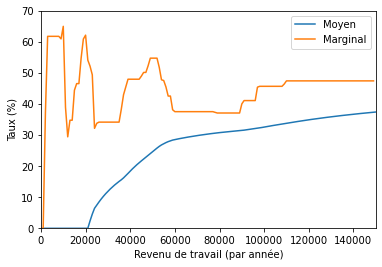

In [12]:
plt.figure()
plt.plot(revenu_travail[1:],tmi, label='Moyen')
plt.plot(revenu_travail[:-1],temis, label='Marginal')
plt.xlabel('Revenu de travail (par année)')
plt.ylabel('Taux (%)')
plt.ylim([0,70])
plt.xlim([0,150000])
plt.legend()
plt.show()